In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [3]:
# Leer datos separados por una coma
data = np.loadtxt(os.path.join('corregido.csv'), delimiter=',')
X, y = data[:, :49], data[:, 49]

m = y.size  # m = numero de ejemplos de entrenamiento

In [4]:
print(X)
print(y)
print(m)

[[1.000000e+00 2.558000e+03 1.506090e+03 ... 3.324319e+04 6.574000e+01
  7.950000e+00]
 [2.000000e+00 2.232500e+04 7.911000e+01 ... 5.157204e+04 6.573000e+01
  6.260000e+00]
 [3.000000e+00 1.150000e+02 1.449850e+03 ... 3.169284e+04 6.581000e+01
  7.840000e+00]
 ...
 [2.020000e+02 1.400000e+01 2.514000e+01 ... 2.153050e+03 6.591000e+01
  6.120000e+00]
 [2.030000e+02 1.000000e+01 9.600000e+01 ... 2.421430e+03 6.597000e+01
  6.320000e+00]
 [2.040000e+02 1.100000e+01 7.730000e+00 ... 3.782680e+03 6.565000e+01
  6.260000e+00]]
[1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [5]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva. 
    
    fig = pyplot.figure()  # abre una nueva figura
    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Beneficio en $10,000')
    pyplot.xlabel('Poblacion de una ciudad en 10,000s')

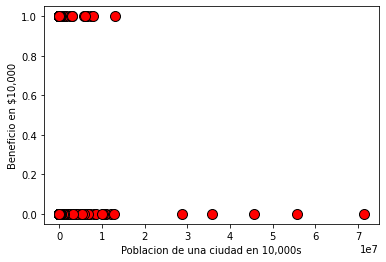

In [6]:
plotData(X, y)

In [10]:
def normalizar(X):
  X_nomr= X.copy()
  mu=np.zeros(X.shape[1])
  sigma=np.zeros(X.shape[1])

  mu= np.mean(X, axis=0)
  sigma=np.std(X, axis=0)
  X_nomr=(X-mu)/sigma
  return X_nomr, mu, sigma

In [11]:
X_norm, mu, sigma=normalizar(X)
print(X)
print('media: ', mu)
print('desviacion: ', sigma)
print(X_norm)

[[1.000000e+00 2.558000e+03 1.506090e+03 ... 3.324319e+04 6.574000e+01
  7.950000e+00]
 [2.000000e+00 2.232500e+04 7.911000e+01 ... 5.157204e+04 6.573000e+01
  6.260000e+00]
 [3.000000e+00 1.150000e+02 1.449850e+03 ... 3.169284e+04 6.581000e+01
  7.840000e+00]
 ...
 [2.020000e+02 1.400000e+01 2.514000e+01 ... 2.153050e+03 6.591000e+01
  6.120000e+00]
 [2.030000e+02 1.000000e+01 9.600000e+01 ... 2.421430e+03 6.597000e+01
  6.320000e+00]
 [2.040000e+02 1.100000e+01 7.730000e+00 ... 3.782680e+03 6.565000e+01
  6.260000e+00]]
media:  [ 8.15880470e+01  3.32842049e+02  6.98707086e+02  8.70992209e+02
  8.41216649e+01  7.69696379e+05  4.32427215e+01  9.12788687e+00
  3.94071291e+03  2.21003202e-01  1.09892743e+02  2.51440768e-01
  3.11216649e-01  4.84663821e-01  1.82892209e-01  3.01931697e-01
  7.74125614e+01  3.11519210e+01  9.09039488e-01  2.28815368e-01
  2.89316969e-01  7.60856243e+01  0.00000000e+00  6.42177161e-01
  5.59910694e+02  5.78292423e-01  7.49819637e+00  6.08399146e-01
  4.27110

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [13]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
X.shape

(937, 50)

In [14]:
print(X)

[[ 1.         -1.24092248  1.15238979 ...  3.68676672  0.38873035
  -0.05837721]
 [ 1.         -1.22552414 11.38954577 ...  6.36218073  0.38776948
  -0.6396642 ]
 [ 1.         -1.21012579 -0.11281849 ...  3.46046621  0.39545643
  -0.09621246]
 ...
 [ 1.          1.85414469 -0.1651255  ... -0.8513792   0.40506512
  -0.68781815]
 [ 1.          1.86954303 -0.16719707 ... -0.81220448  0.41083033
  -0.61902679]
 [ 1.          1.88494138 -0.16667918 ... -0.6135064   0.38008253
  -0.6396642 ]]


In [15]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento
   
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [ ]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = computeCost(X, y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente)  54.24')

In [16]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    
    # hace una copia de theta, para evitar cambiar la matriz original, 
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()
    
    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In [18]:
# inicializa los parametros de ajuste
theta = np.zeros(50)

# configuraciones para el descenso por el gradiente
iterations = 15000
alpha = 0.003

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print(J_history[-1])
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

nan
Theta encontrada por descenso gradiente: nan, nan
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


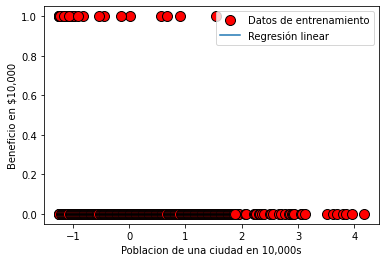

In [19]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

In [26]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780,0.19,214.7,0.21,0.26,0.49,0.1,0.4,99.59,32.19,1.84,0.16,0.2,87.65,0,0.47,132.78,-0.01,3.78,0.22,3.2,-3.71,-0.18,2.19,0,2.19,310,16110,0,138.68,89,69,2850,1000,763.16,135.46,3.73,0,33243.19,65.74,7.95,1], theta)
print('Para una población = 35,000, se predice un beneficio de {:.2f}\n'.format(predict1*10000))

#predict2 = np.dot([1, 9], theta)
#print('Para una población de = 70,000, se predice un beneficio de {:.2f}\n'.format(predict2*10000))

ValueError: ignored